Working with 0 lambda

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs            

In [2]:
par = np.array([10, 28, 8/3])
x0 = np.array([0, 1, 1.05])
dt = 0.01

In [3]:
def timestep(x, par):
    dx = np.array([par[0] * (x[1] - x[0]), 
                   x[0] * (par[1] - x[2]) - x[1],
                   x[0] * x[1] - par[2] * x[2]])
    return dx

In [4]:
tf = 100
nt = int(tf/dt + 1)
t = np.linspace(0, tf, nt)
x = np.zeros((3, nt))
x[:, 0] = x0
for i in np.arange(nt - 1):
    x[:, i + 1] = x[:, i] + dt * timestep(x[:, i], par)

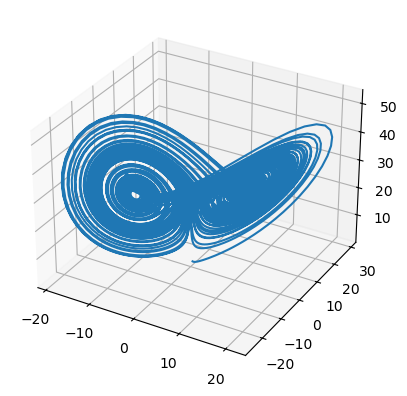

In [5]:
ax = plt.axes(projection = '3d')
ax.plot3D(x[0, :], x[1, :], x[2, :])
plt.show()

In [6]:
n = 500    # Number of neurons
m = 3       # Input dimension

Win = np.random.uniform(-0.1, 0.1, [n, m])      # Weights connected from m inputs to n neurons

A = np.zeros((n, n))        # Adjacency matrix of n neurons in reservoir
for i in np.arange(n):
    for j in np.arange(n):
        temp = np.random.randint(0, n)
        if temp < 6 :
            A[i, j] = np.random.uniform(-0.5, 0.5)

spec = max(abs(eigs(A, v0 = np.ones(n))[0]))
A = A/spec


In [7]:
r = np.zeros((n, nt))

#r = np.random.uniform(-0.5, 0.5, [n, nt])
for i in np.arange(nt - 1):
    r[:, i + 1] = np.tanh(np.matmul(A, r[:, i]) + np.matmul(Win, x[:, i]) + np.ones(n))

yt = x[:, 1 :] 
beta = yt.flatten()
r = r[:, : - 1]

In [8]:
l = 10^(-6)
Woutnew = np.matmul(r, np.transpose(r))
Woutnew = np.linalg.inv(Woutnew + l*np.identity(n))
Woutnew = np.matmul(Woutnew, r)
Woutnew = np.matmul(Woutnew, np.transpose(yt))
Woutnew = np.transpose(Woutnew)
ypred = np.matmul(Woutnew, r)

In [10]:
""" nt = nt - 1
alpha = np.zeros((nt * m, n * m))
alpha[0 : nt, 0 : n] = np.transpose(r)
alpha[nt : 2 * nt, n : 2 * n] = np.transpose(r)
alpha[2 * nt : 3 * nt, 2 * n : 3 * n] = np.transpose(r)


l = 0
delta = np.linalg.inv(np.matmul(np.transpose(alpha), alpha) + l*np.identity(m * n))
delta = np.matmul(delta, np.transpose(alpha))
delta = np.matmul(delta, beta)
Wout = np.zeros((m, n))
Wout[0, :] = delta[0 : n]
Wout[1, :] = delta[n : 2*n]
Wout[2, :] = delta[2*n : 3*n]
ypred = np.matmul(Wout, r) """

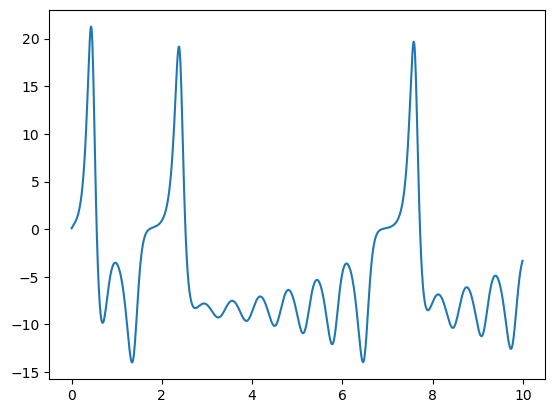

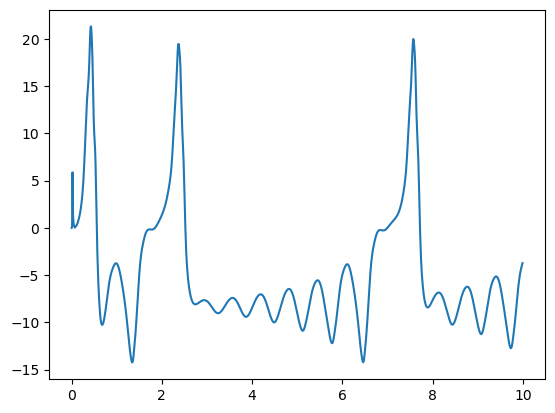

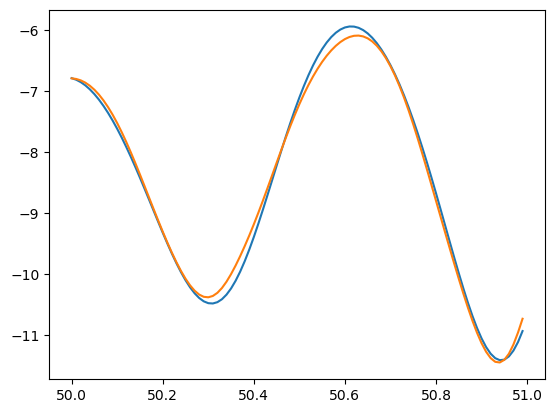

In [9]:
plt.plot(t[0 : 1000], yt[0, 0 : 1000])
plt.show()
plt.plot(t[0 : 1000], ypred[0, 0 : 1000])
plt.show()
plt.plot(t[5000:5100], yt[0, 5000:5100])
plt.plot(t[5000:5100], ypred[0, 5000:5100])
plt.show()

In [10]:
tf_test = 200
nt_test = int((tf_test - tf)/dt + 1)
t_test = np.linspace(tf, tf_test, nt_test)
x_test = np.zeros((3, nt_test))
x_test[:, 0] = x[:, -1]
for i in np.arange(nt_test - 1):
    x_test[:, i + 1] = x_test[:, i] + dt * timestep(x_test[:, i], par)

ypred_test = np.zeros((3, nt_test))
ypred_test[:, 0] = x[:, -1]

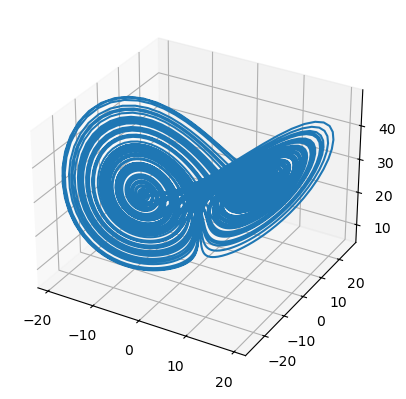

In [11]:
ax = plt.axes(projection = '3d')
ax.plot3D(x_test[0, :], x_test[1, :], x_test[2, :])
plt.show()

In [13]:
r_test = np.zeros((n, nt_test))
r_test[:, 0] = r[:, -1]

for i in np.arange(nt_test - 1):
    r_test[:, i + 1] = np.tanh(np.matmul(A, r_test[:, i]) + np.matmul(Win, ypred_test[:, i]) + np.ones(n))
    ypred_test[:, i + 1] = np.matmul(Woutnew, r_test[:, i + 1])


In [12]:
r_test = np.zeros((n, nt_test))
r_test[:, 0] = r[:, -1]

for i in np.arange(nt_test - 1):
    r_test[:, i + 1] = np.tanh(np.matmul(A, r_test[:, i]) + np.matmul(Win, x_test[:, i]) + np.ones(n))
    ypred_test[:, i + 1] = np.matmul(Woutnew, r_test[:, i + 1])


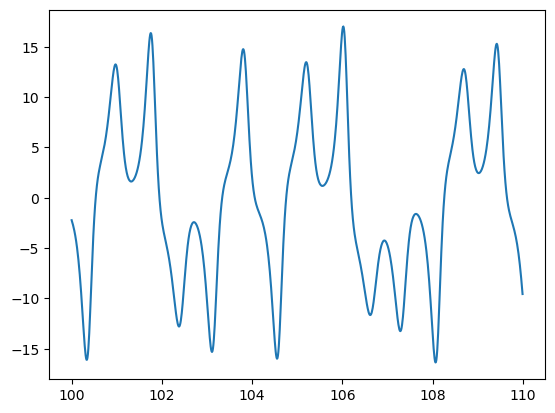

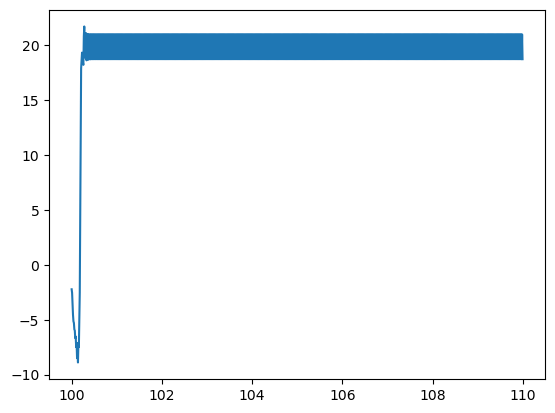

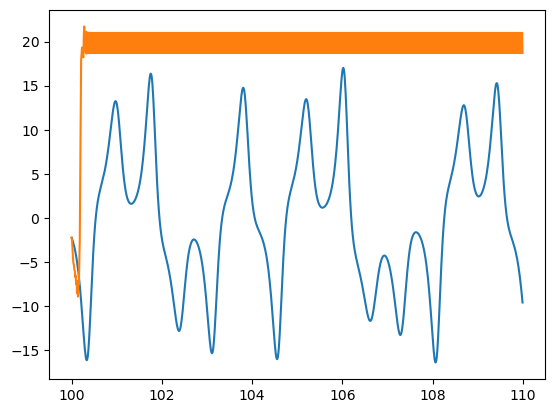

In [14]:
plt.plot(t_test[0:1000], x_test[0, 0:1000])
plt.show()
plt.plot(t_test[0:1000], ypred_test[0, 0:1000])
plt.show()
plt.plot(t_test[0:1000], x_test[0, 0:1000])
plt.plot(t_test[0:1000], ypred_test[0, 0:1000])
plt.show()

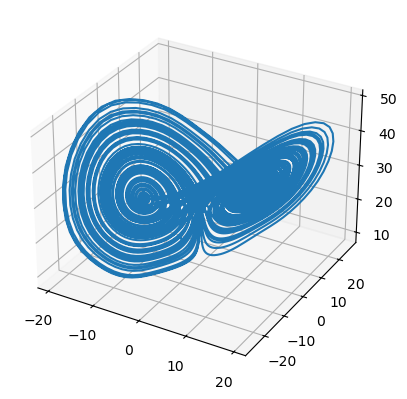

In [25]:
ax = plt.axes(projection = '3d')
ax.plot3D(ypred_test[0, :], ypred_test[1, :], ypred_test[2, :])
plt.show()